In [214]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import csv


In [273]:
number = 1

In [274]:
fileDir = "./measures/"
fileName = f"soilMoistureSensor{number}"
extension = ".csv"
file = fileDir + fileName + extension
figureDir = "./measures/figures/"
figure = figureDir+fileName+".png"


In [275]:
x_ = []
y_ = []
with open(file) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    line = 0
    for row in csv_reader:
        if line == 0:
            cm3_ = row[0]
        elif line == 1:
            x_ = row
        elif line == 2:
            y_ = row
        line += 1
print(x_)
print(y_)
cm3 = np.array(cm3_, dtype=int)
x = np.array(x_, dtype=int)
y = np.array(y_, dtype=int)/cm3 # cm3 of water per cm3 of dry soil
print(y)


['2879', '2165', '1508', '1362', '1316']
['0', '50', '100', '150', '200']
[0.         0.08333333 0.16666667 0.25       0.33333333]


In [276]:
model = np.poly1d(np.polyfit(x,y,2))
r_sq = r2_score(y, model(x))
print(fileName)
print(f"r_sq: {r_sq}")
coefs = model.coefficients
print(f"coefs: {coefs}")
formattedOutput = f"({coefs[0]:.8f},{coefs[1]:.8f},{coefs[2]:.8f})"
print(formattedOutput)


soilMoistureSensor1
r_sq: 0.9140799861147443
coefs: [ 1.21331970e-07 -6.86297454e-04  9.76469830e-01]
(0.00000012,-0.00068630,0.97646983)


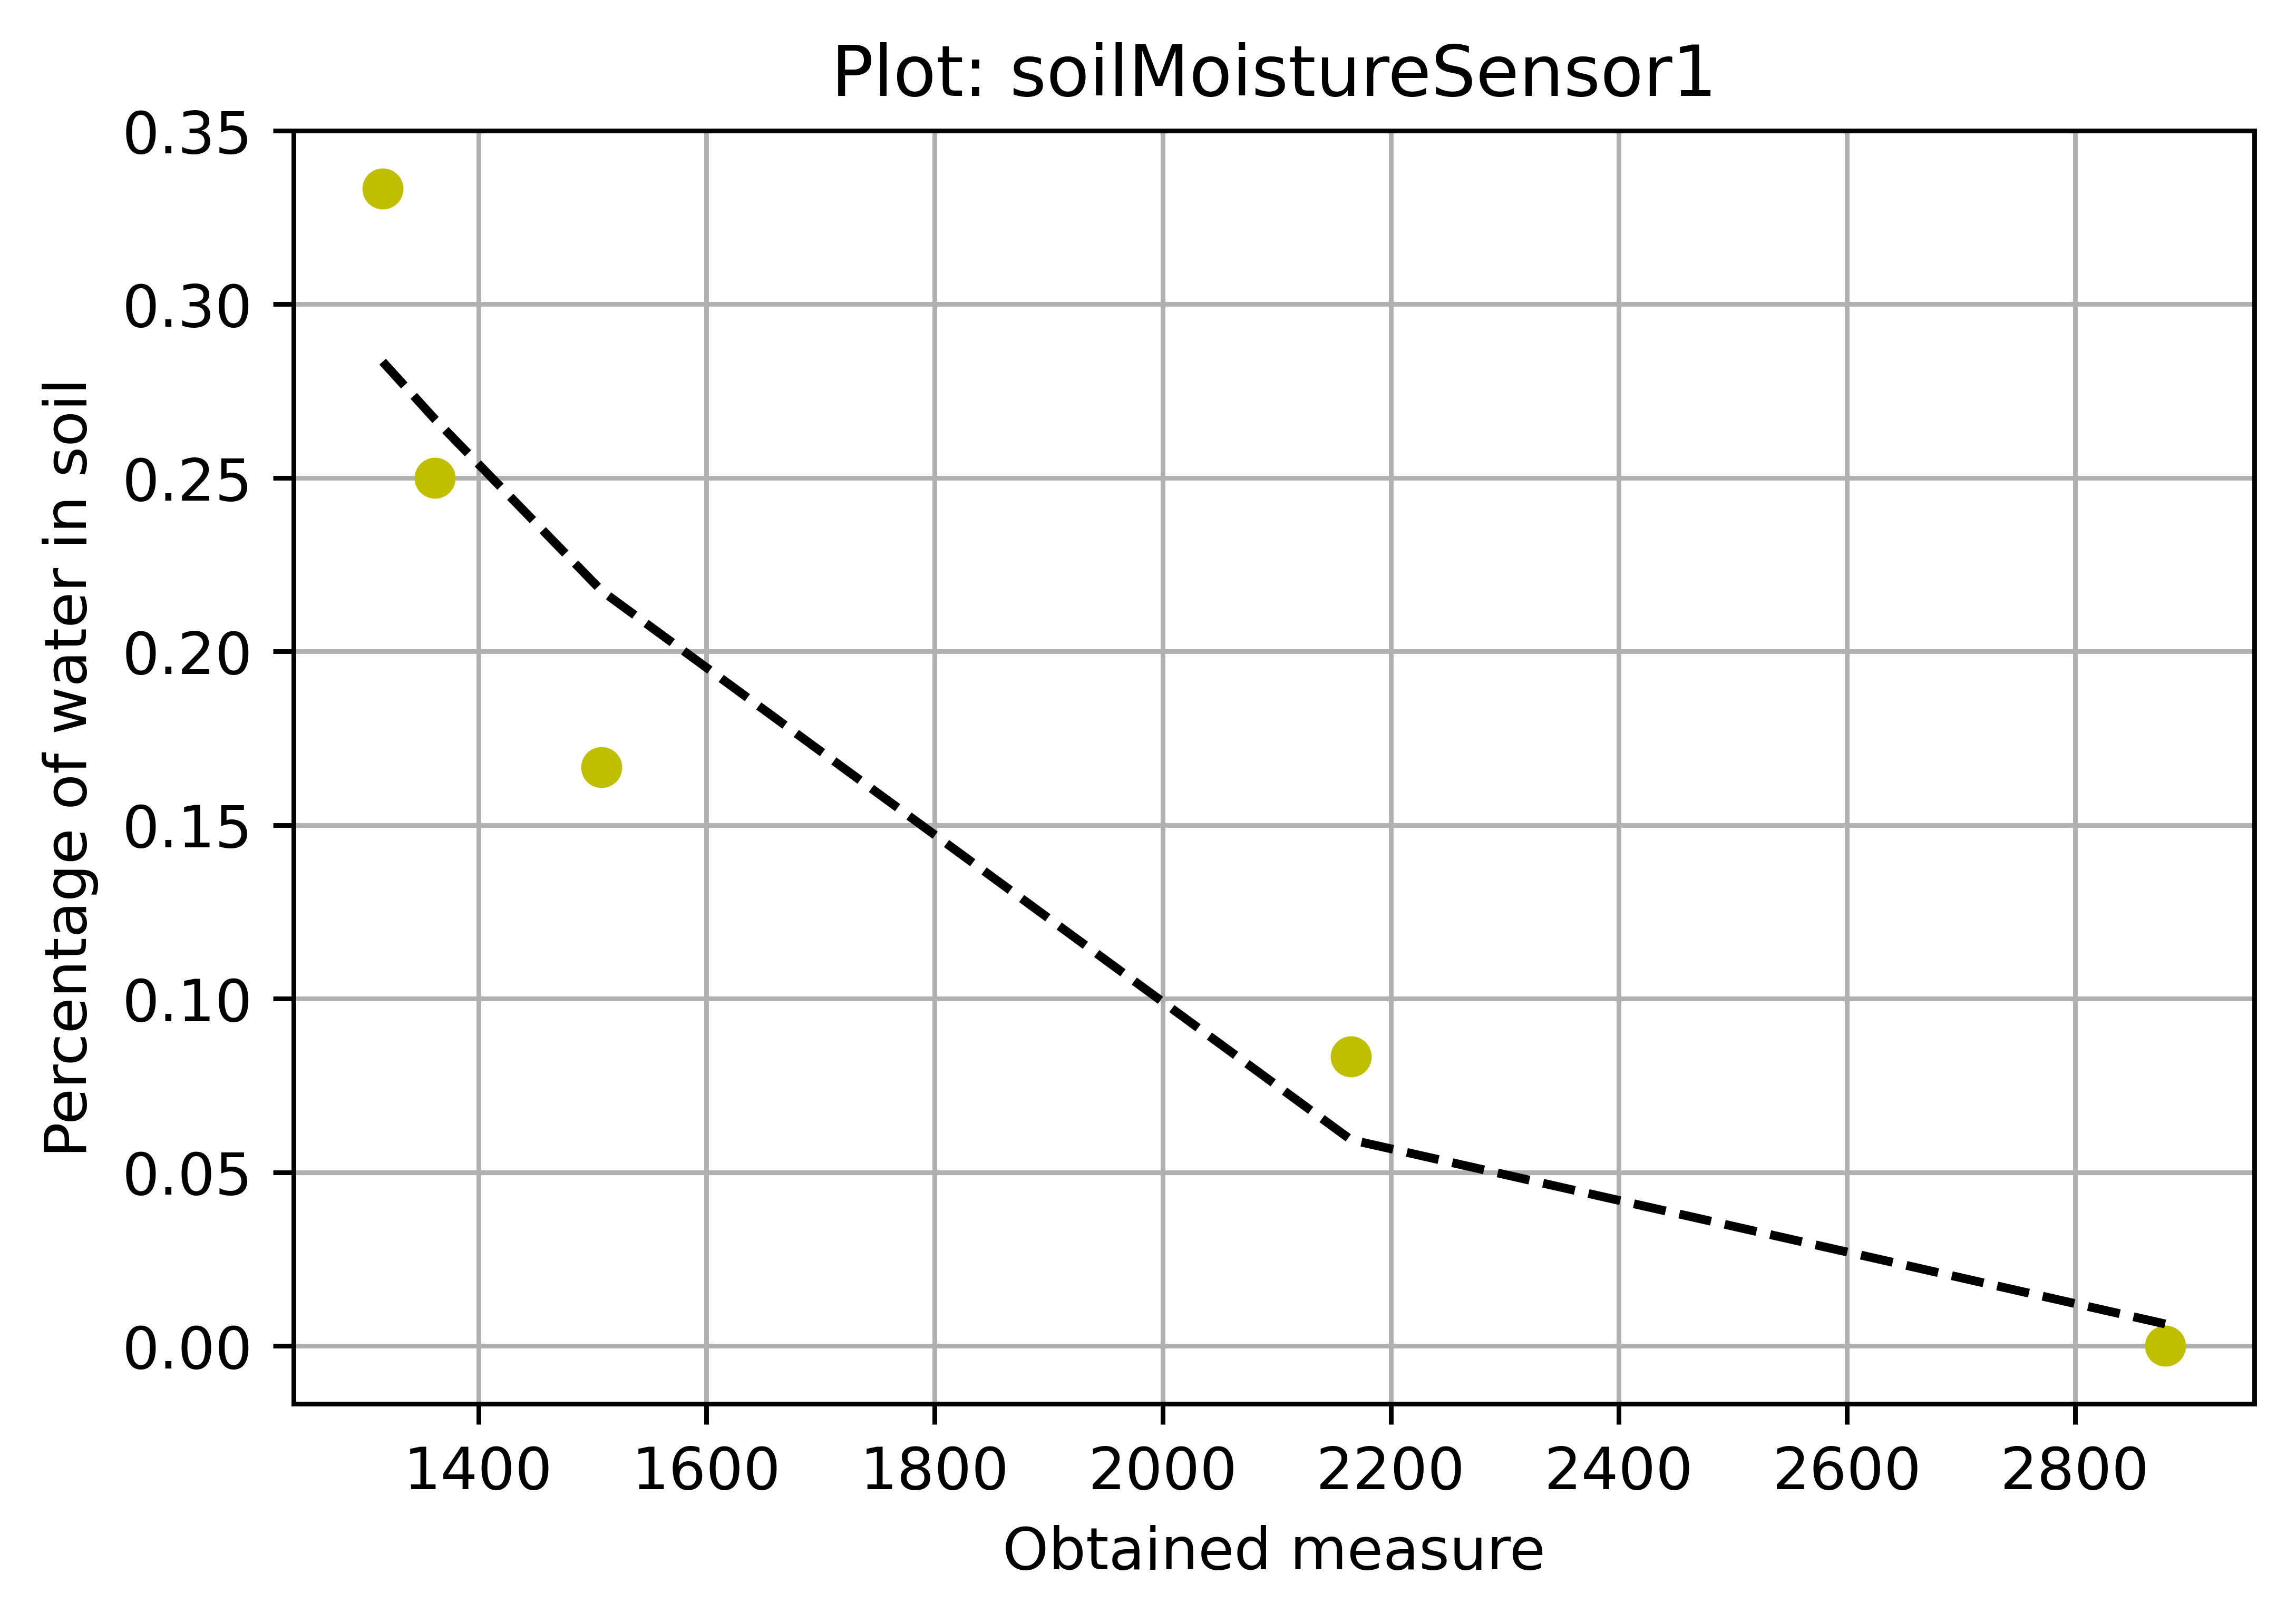

In [277]:
plt.figure(dpi=800)
plt.plot(x, y, 'yo', x, model(x), '--k')
plt.title(f"Plot: {fileName}")
plt.xlabel("Obtained measure")
plt.ylabel("Percentage of water in soil")
plt.grid(True)
plt.savefig(figure)
plt.show()


In [259]:
print(model(1657))

0.17569214881899586


In [230]:
modelString = str(model.c)
print(modelString)
string = "(0.00007026,-0.40244493,579.35602573)"
res = string.strip("()").split(",")
a = float(res[0])
b = float(res[1])
c = float(res[2])
print(a)
print(b)
print(c)
measure = 1657
water = a*pow(measure,2) + b*measure + c
print(water)

[ 7.02604397e-05 -4.02444926e-01  5.79356026e+02]
7.026e-05
-0.40244493
579.35602573
105.4140754600001


In [260]:
print(1e6)

1000000.0
